In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sms
import numpy as np
from pandas import datetime

C:\Users\HP\AppData\Local\Temp\ipykernel_10332\2259222459.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/blue-yonder/pydse/master/pydse/data/sales-of-shampoo-over-a-three-ye.csv" ,sep= ';')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df= pd.read_csv("https://raw.githubusercontent.com/blue-yonder/pydse/master/pydse/data/sales-of-shampoo-over-a-three-ye.csv" ,sep= ';', index_col=[0], parse_dates=True, squeeze=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_10332\51549006.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df= pd.read_csv("https://raw.githubusercontent.com/blue-yonder/pydse/master/pydse/data/sales-of-shampoo-over-a-three-ye.csv" ,sep= ';', index_col=[0], parse_dates=True, squeeze=True)


In [5]:
df.head()

Month
01-01    266.0
01-02    145.9
01-03    183.1
01-04    119.3
01-05    180.3
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Month'>

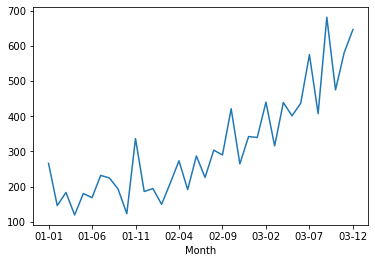

In [6]:
df.plot()

<AxesSubplot:xlabel='Month'>

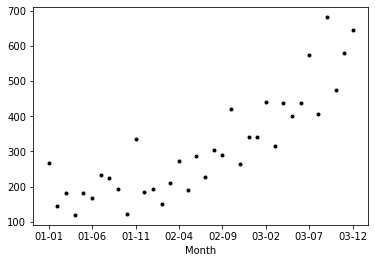

In [7]:
df.plot(style='k.')

In [8]:
df.describe()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales, dtype: float64

In [9]:
df_moving_average= df.rolling(window=10).mean()

<AxesSubplot:xlabel='Month'>

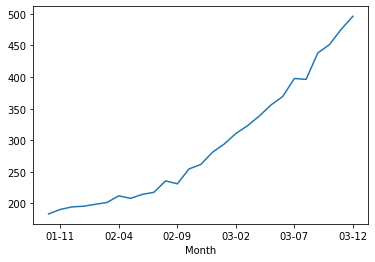

In [10]:
df_moving_average.plot()

In [11]:
df_base= pd.concat([df, df.shift(1)], axis=1)

In [12]:
df_base.columns= ['Actual_Sales' , 'Forecast_Sales']

In [13]:
df_base.head()

,Actual_Sales,Forecast_Sales
Month,,
01-01,266.0,NaN
01-02,145.9,266.0
01-03,183.1,145.9
01-04,119.3,183.1
01-05,180.3,119.3


In [14]:
df_base.dropna(inplace=True)

In [15]:
df_base.head()

,Actual_Sales,Forecast_Sales
Month,,
01-02,145.9,266.0
01-03,183.1,145.9
01-04,119.3,183.1
01-05,180.3,119.3
01-06,168.5,180.3


In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
import numpy as np

In [18]:
df_error= mean_squared_error(df_base.Actual_Sales, df_base.Forecast_Sales)

In [19]:
df_error

11715.388285714285

In [20]:
np.sqrt(df_error)

108.23764726616282

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
def adf_test(series):
    result= adfuller(series)
    print('ADF Statistics : {}'.format(result[0]))
    print('p_value : {}'.format(result[1]))
    if result[1] <= 0.05:
        print("Null hypothesis rejected, Data is stationary")
    else:
        print('Null hypothesis accepted, Data is not stationary')

In [23]:
adf_test(df)

ADF Statistics : 3.0601420836411806
p_value : 1.0
Null hypothesis accepted, Data is not stationary


In [24]:
df_moving_average= pd.DataFrame(df_moving_average)

In [25]:
type(df_moving_average)

pandas.core.frame.DataFrame

In [27]:
adf_test(df_moving_average['Sales'].dropna())

ADF Statistics : 3.265832465894095
p_value : 1.0
Null hypothesis accepted, Data is not stationary


In [28]:
df_moving_average['Sales_first_differencing']= df_moving_average['Sales'] - df_moving_average['Sales'].shift(1)

In [29]:
adf_test(df_moving_average['Sales_first_differencing'].dropna())

ADF Statistics : -0.824198324377407
p_value : 0.8119104562917265
Null hypothesis accepted, Data is not stationary


In [30]:
df_moving_average['Sales_second_differencing']= df_moving_average['Sales'] - df_moving_average['Sales'].shift(2)

In [31]:
adf_test(df_moving_average['Sales_second_differencing'].dropna())

ADF Statistics : -0.014198124793967034
p_value : 0.9573420420756598
Null hypothesis accepted, Data is not stationary


In [32]:
df_moving_average['Sales_twelve_differencing']= df_moving_average['Sales'] - df_moving_average['Sales'].shift(12)

In [33]:
adf_test(df_moving_average['Sales_twelve_differencing'].dropna())

ADF Statistics : -0.4698249693540179
p_value : 0.8977716617218017
Null hypothesis accepted, Data is not stationary


In [34]:
#WE can see that dicky fuller test is showing no positive results

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

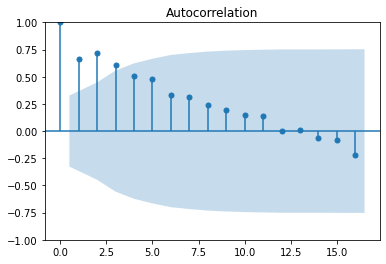

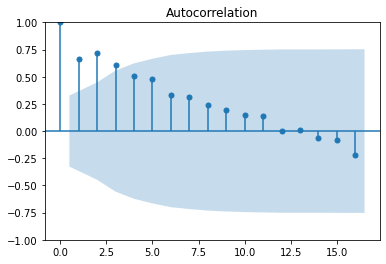

In [36]:
plot_acf(df)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


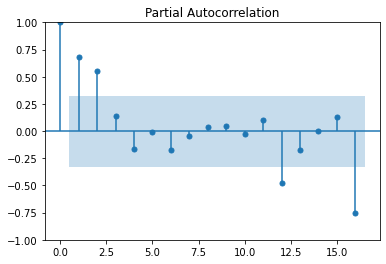

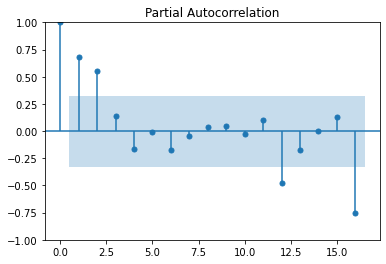

In [37]:
plot_pacf(df)

In [38]:
from statsmodels.tsa.arima_model import ARIMA

In [39]:
df_train= df[0:25]
df_test= df[25:36]

In [40]:
from statsmodels.tsa.arima.model import ARIMA
df_model = ARIMA(df_train, order=(1,1,1))


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [41]:
df_model_fit= df_model.fit()

In [42]:
df_model_fit.aic

273.98827531047624

In [43]:
df_forecast= df_model_fit.forecast(steps=11)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [44]:
np.sqrt(mean_squared_error(df_test,df_forecast))

193.998137384417

In [45]:
p_values = range(0,5)
d_values = range(0,3)
q_values = range(0,5)

In [46]:
import warnings
warnings.filterwarnings("ignore")

In [47]:
for p in range(0,5):
    for d in range(0,3):
        for q in range(0,5):
            order=(p,d,q)
            train,test = df[0:25], df[25:36]
            predictions= list()
            for i in range(len(test)):
                try:
                    model=ARIMA(train,order)
                    model_fit= model.fit(disp=0)
                    pred_y= model_fit.forecast()[0]
                    predictions.append(pred_y)
                    error= mean_squared_error(test,predictions)
                    print('ARIMA%s MSE= %.2f'% (order,error))
                    
                except:
                    continue